<a href="https://colab.research.google.com/github/GentleLemon/my_colaboratory/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 加载MNIST数据集

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# 建模
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# 两个链接在一起的Dense层，每层都对输入数据做张量运算。权重张量是该层的属性，里面包含李模型所学到的知识。

In [ ]:
# 编译优化器、损失函数
model.compile(optimizer="rmsprop",  # 优化器
                    loss="sparse_categorical_crossentropy",  # 损失函数，衡量预测值和实际值间的差异，是反馈信号，训练时使其最小化
                    metrics=["accuracy"])

In [ ]:
# 准备图像数据
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
# 训练模型
model.fit(train_images, train_labels, epochs=5, batch_size=128)  
# 每个小批量包含128个样本，共迭代5轮（所有数据上迭代一次叫作一轮epoch）。对每批数据，模型会计算损失相对于权重的梯度，并将权重沿着减小该批量对应损失值的方向移动。
# 5轮后，模型共执行2345次梯度更新（469*5）

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.4613 - accuracy: 0.6646
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5775 - accuracy: 0.8555
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4080 - accuracy: 0.8885
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3521 - accuracy: 0.9009
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.9073


In [ ]:
# 预测
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 16ms/step


array([3.3974513e-05, 7.1702246e-08, 1.6303124e-05, 3.3953477e-04,
       9.2819738e-07, 2.1292930e-05, 3.5734418e-09, 9.9810106e-01,
       4.9270743e-06, 1.4818294e-03], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.99810106

In [ ]:
test_labels[0]

7

In [ ]:
import numpy as np

In [ ]:
x = np.array([[5, 78, 38, 9
                , 4, 34, 9, 20
                , 4, 34, 9, 20]]
             )

In [ ]:
x.ndim

2

In [ ]:
x1 = np.array([[[5, 78, 38, 9
                , 4, 34, 9, 20
                , 4, 34, 9, 20]]
             ,[[5, 78, 38, 9
                , 4, 34, 9, 20
                , 4, 34, 9, 20]]]
             )

In [ ]:
x1.ndim

3

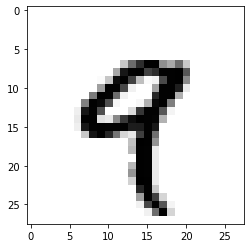

In [ ]:
import matplotlib.pyplot as plt 

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
# 逐元素运算
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, i] = max(x[i, j], 0)
    return x

In [ ]:
import time 

x = np.random.random((20, 100))

In [ ]:
x.shape

(20, 100)

In [ ]:
t0 = time.time()
for i in range(1000):
    z = naive_relu(x)

print("took:{0: .2f} s".format(time.time() - t0))

took: 1.21 s


In [ ]:
y = np.random.random((10))

In [ ]:
y

array([0.9000501 , 0.90275454, 0.66198686, 0.85759351, 0.33270223,
       0.28693285, 0.59579514, 0.16833399, 0.96934798, 0.62453025])

In [ ]:
y1 = np.expand_dims(y, axis=0)

In [ ]:
y1

array([[0.9000501 , 0.90275454, 0.66198686, 0.85759351, 0.33270223,
        0.28693285, 0.59579514, 0.16833399, 0.96934798, 0.62453025]])

In [ ]:
y1.shape

(1, 10)

In [ ]:
y2 = np.concatenate([y1] * 32, axis=0)

In [ ]:
y2.shape

(32, 10)

用TensorFlow从头开始重新实现第一个例子

1. 简单的Dense类

In [ ]:
import tensorflow as tf


class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        sefl.b = tf.Variable(b_initial_value)

  def __call__(self, inputs):
    return self.activation(tf.matmul(inputs, self.W) + self.b)

  @property
  def weights(self):
      return [self.W, self.b]

IndentationError: ignored

张量运算

In [ ]:
import tensorflow as tf

x = tf.ones((2, 2))
a = tf.square(x)
print(a)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [ ]:
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
b = tf.sqrt(a)

In [ ]:
c = a + b

In [ ]:
a *= b

In [ ]:
tf.matmul(a, b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
import numpy as np

np.dot(a, b)

array([[2., 2.],
       [2., 2.]], dtype=float32)

In [ ]:
b *= c

In [ ]:
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
b * c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>